In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
nfov = (100, 100)
xa, ya = np.meshgrid(
    np.arange(nfov[0]) - nfov[0] // 2, np.arange(nfov[1]) - nfov[1] // 2
)

In [3]:
geoms = np.array(
    [
        [10, 12, 7, 10, -0.5, 0.5, 1, 10],
        [10, 12, 10, 13, -0.5, 0.5, 1, 10],
        [10, 12, 13, 16, -0.5, 0.5, 2, 10],
    ]
)
geoms_xy_centers = np.vstack((np.mean(geoms[:,0:2],axis=1),np.mean(geoms[:,2:4],axis=1)))


In [5]:
def get_transformed(xys: np.ndarray, trans: dict) -> np.ndarray:
    angle = np.deg2rad(trans["angle"])
    translation = np.array([trans["shiftR"],trans["shiftT"]]).reshape((2,1))
    mr = np.array(
        [
            [np.cos(angle), -np.sin(angle)],
            [np.sin(angle), np.cos(angle)],
        ]
    )
    return np.matmul(mr,(xys+translation))
    # return np.matmul(mr,xys)

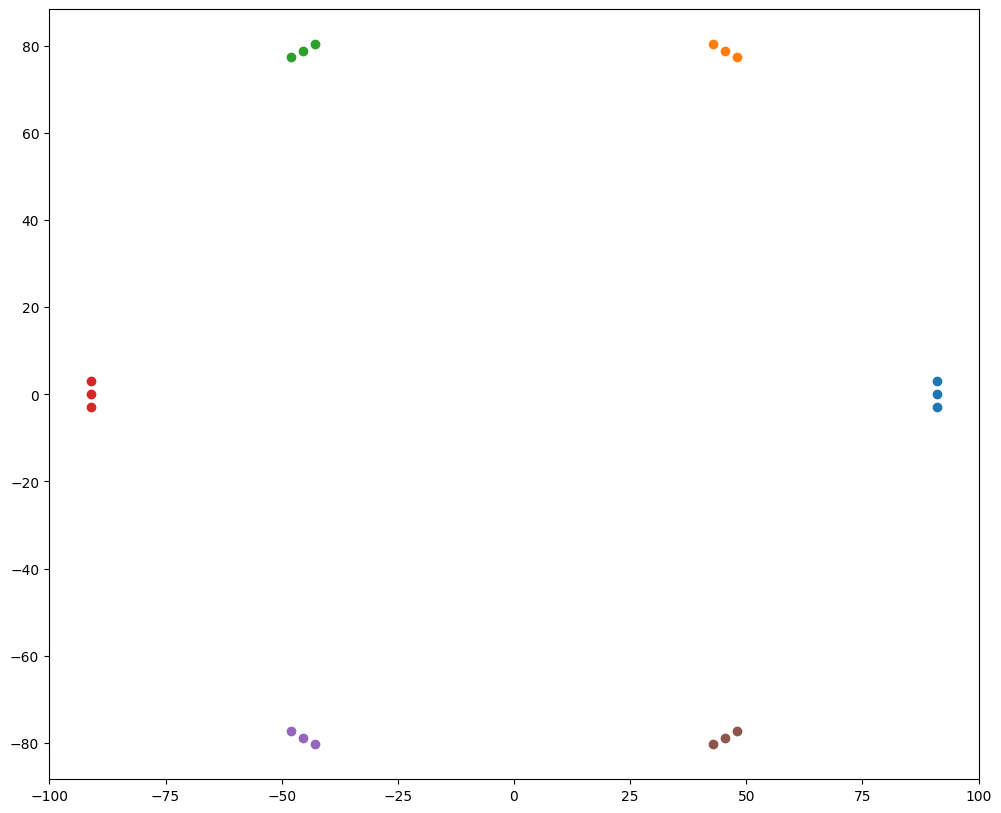

In [6]:
shiftT=-(np.max(geoms[:,3])+np.min(geoms[:,2]))/2
fig, ax = plt.subplots(figsize=(12,10))
for angle in np.arange(6)*60:
    trans_test = {"angle": angle, "shiftR": 80, "shiftT": shiftT}
    xys = get_transformed(geoms_xy_centers,trans_test)
    ax.scatter(xys[0],xys[1])

In [41]:
trans_test={"angle": 0, "shiftR": 80, "shiftT": shiftT}
xys = get_transformed(geoms_xy_centers,trans_test)
xab = np.repeat(xa[:, :, np.newaxis], xys.shape[1], axis=2) - xys[0]
yab = np.repeat(ya[:, :, np.newaxis], xys.shape[1], axis=2) - xys[1]

In [30]:
sampling_angles = np.abs(np.arctan2(yab, xab))

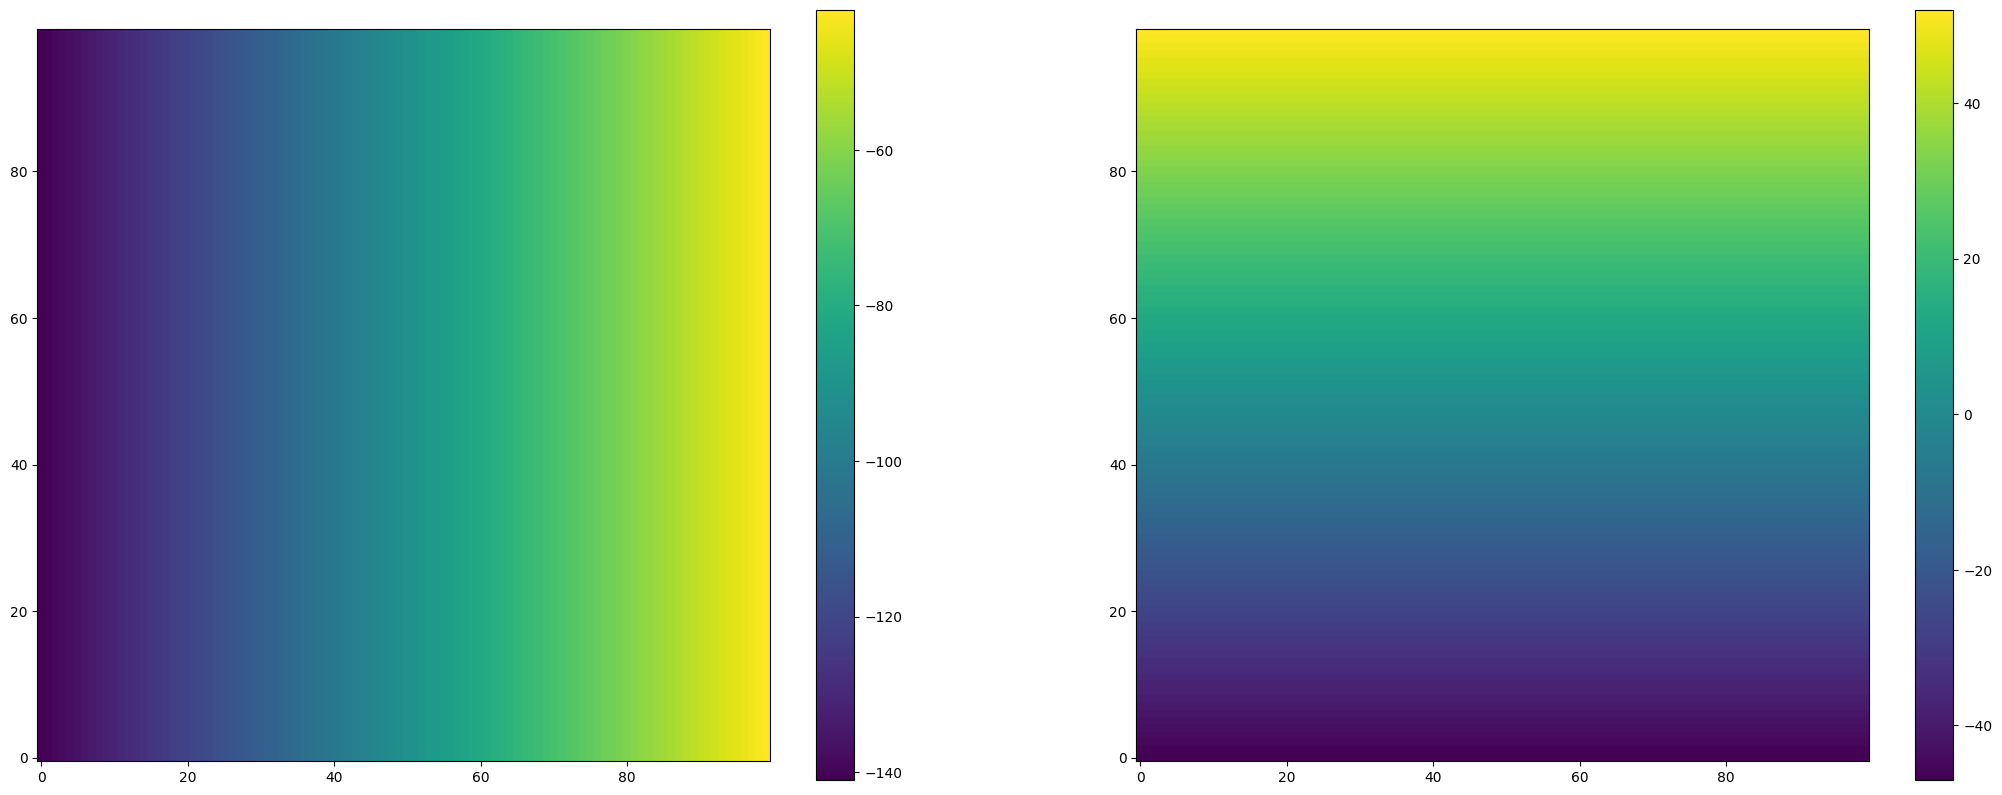

In [25]:
fig, axs = plt.subplots(1,2,figsize=(26,10))
fig.colorbar(axs[0].imshow(xab[:,:,0], origin='lower'))
fig.colorbar(axs[1].imshow(yab[:,:,0], origin='lower'))

(36, 3, 100, 100)


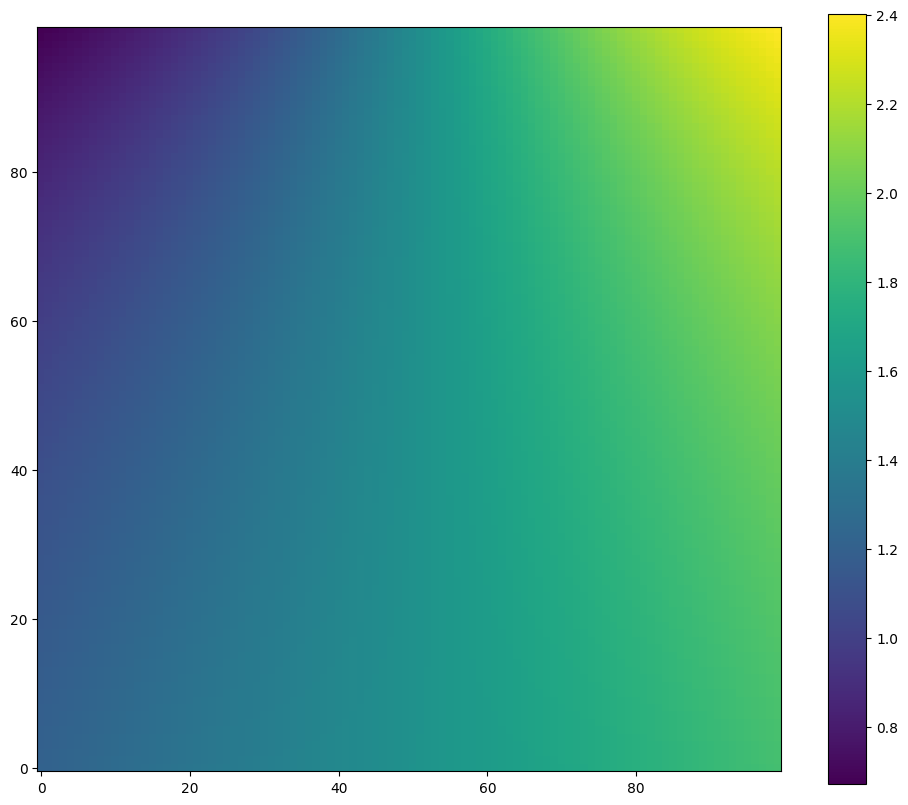

In [89]:
print(sampling_angels.shape)
fig, ax = plt.subplots(figsize=(12,10))
fig.colorbar(ax.imshow(sampling_angles[9,0,:,:], origin='lower'))

In [81]:
sampling_angles = []
for angle in np.arange(36) * 10:
    trans_test = {"angle": angle, "shiftR": 80, "shiftT": shiftT}
    xys = get_transformed(geoms_xy_centers, trans_test)
    xab = xys[0] - np.repeat(xa[:, :, np.newaxis], xys.shape[1], axis=2)
    yab = xys[1] - np.repeat(ya[:, :, np.newaxis], xys.shape[1], axis=2)
    sampling_angles.append(np.moveaxis(np.arctan2(yab, xab), -1, 0))
sampling_angles = np.asarray(sampling_angles)
sampling_angles_2d = sampling_angles.reshape((36 * 3, 100 * 100))

In [113]:
sampling_angle_counts=[]
N_angles=144
for idx in np.arange(10000):
    sampling_angle_counts.append(np.count_nonzero(np.histogram(sampling_angles_2d[:,idx], bins=np.arange(N_angles+1)*(np.pi/N_angles*2)-np.pi, density=False)[0]))
sampling_angle_counts=np.asarray(sampling_angle_counts)

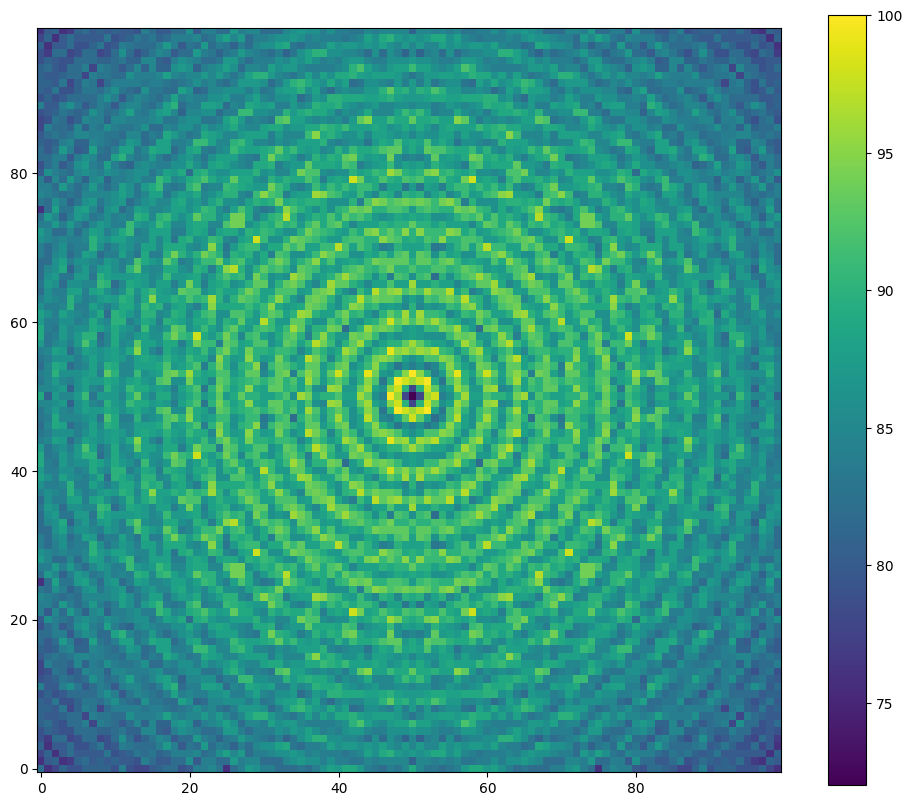

In [114]:
fig, ax = plt.subplots(figsize=(12,10))
fig.colorbar(ax.imshow(sampling_angle_counts.reshape((100,100)), origin='lower'))

## Create dummy PPDFs

In [ ]:
import numpy as np
from skimage.draw import polygon


def get_transformed(xys: np.ndarray, trans: dict) -> np.ndarray:
    angle = np.deg2rad(trans["angle"])
    translation = np.array([trans["shiftR"], trans["shiftT"]]).reshape((2, 1))
    mr = np.array(
        [
            [np.cos(angle), -np.sin(angle)],
            [np.sin(angle), np.cos(angle)],
        ]
    )
    return np.matmul(mr, (xys + translation))


def add_ppdf_strip(img: np.ndarray, w_s: int, w_e: int, t_c: int = img.shape[0] // 2):
    poly_0 = np.array(
        (
            (t_c - 0.5 * w_s, -10),
            (t_c - 0.5 * w_e, img.shape[1] + 10),
            (t_c + 0.5 * w_e, img.shape[1] + 10),
            (t_c + 0.5 * w_s, -10),
        )
    )
    xx, yy = polygon(ploy_rot[:, 0], ploy_rot[:, 1], img.shape)
    xc = poly[0, 0] + 0.5 * start_w
    img[xx, yy] = 1